# Statistikk fra Bokhylla på _jøde_

Bare hopp over den første biten til dere kommer til en neste hovedoverskrift. Deretter kan narrative følges.

Fra mail:
``
1. Antall bokutgivelser som inneholder følgende ord: jøde, jøden, jøder, jødene, jøderne, jødisk, jødiske.
 

Her må det lages lister over bokutgivelsene med forfatter og titler. 

2. Hva står i umiddelbar nærhet av ord og ordsammensetninger med jøde?

Her må betydningsbærende ord fremheves og disse må kunne skilles i nøytrale, positive og negative kategorier.

Av bokutgivelser for perioden ser jeg at det er ca. 200 titler pr. år. Forekomstene av ord og ordkombinasjoner med jøde i hver enkelt bokutgivelse varierer stort.

For min egen del trenger jeg en slik statistikk for å kunne si noe om det store bildet på bakgrunn av Hamsuns bokutgivelser som jeg leser manuelt.
``

##### Boot cell

Skip if `module_update.py` is in same folder as notebook, next cell downloads this file which in turn will download other files.

In [1]:
import urllib.request, shutil
with urllib.request.urlopen("https://raw.githubusercontent.com/Yoonsen/Modules/master/module_update.py") as response, open("module_update.py", 'wb') as out_file:
    shutil.copyfileobj(response, out_file)

##### Get essentials

Import text and graph modules for analysis, and css for display

In [2]:
from module_update import update, css

In [3]:
css()

##### Module imports

In [4]:
update('graph_networkx_louvain')
import nbtext as nb
import graph_networkx_louvain as gnl
import networkx as nx
from graph_networkx_louvain import cutdown, make_collocation_graph
import pandas as pd
from IPython.display import Markdown as md
import matplotlib.pyplot as plt
%matplotlib inline

Updated file `C:\Users\larsj\Documents\Notebookprosjekter\Ståle_og_Madelen\graph_networkx_louvain.py`

# Bygg korpus og analysér

Hent URN-er fra tekst eller metadata. URNene representer korpuset, eller en definisjon av korpuset. Korpuset bygges med ordene som metadata lagt inn i variabelen `words`. Korpusets URNer ligger i variabelen `korpusår`.

In [5]:
words = """ jøde, jøden, jøder, jødene, jøderne, jødisk, jødiske""".split(', ')
words = words + [x.capitalize() for x in words]
korpusår = dict()
for anno in range(1920, 1941):
    korpusår[anno] = nb.get_urn({'words':words, 'year':anno, 'next':0, 'limit':1000})

## Oversikt pr år

Her er statistikk over alle bøkene som inneholder minst en av ordene i `words`. Variabelen `anno_data` innholder statistikken over antall bøker fordelt på år, se også stolpediagrammet under.

In [6]:
anno_data = pd.DataFrame.from_dict({a: len(korpusår[a]) for a in korpusår}, orient='index')

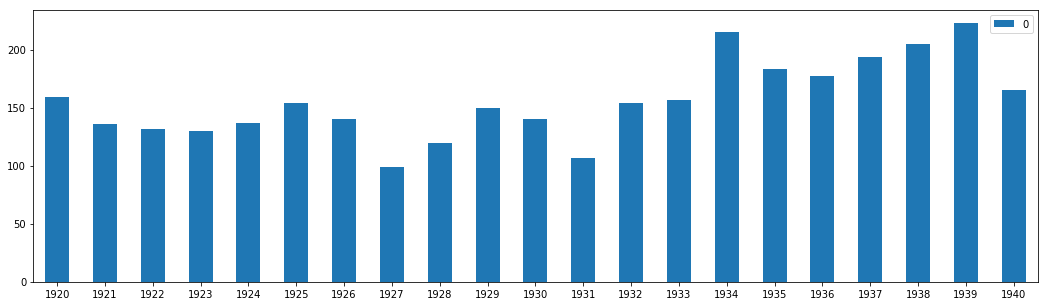

In [7]:
anno_data.plot(kind='bar', figsize=(18,5), rot=0)

Det totale antallet bøker for perioden 1920-1940 som inneholder en av ordene i `words` er 3277.

In [8]:
int(anno_data.sum())

3277

## Frekvenser over ordene

Slå sammen korpuset til en stor ordbag, en liste over alle frekvenser. Variabelen `all_urns` inneholder alle URNene i korpuset.

In [25]:
all_urns = []
for anno in korpusår:
    all_urns += korpusår[anno]
len(all_urns)

3277

### Fra lagrede data

Speeder opp prosessen ved å bruke lagrede data

Aggreger korpus - kommentert ut siden data er lagret, konverter cellene til `code` for å kjøre på nytt.

aggs = nb.get_aggregated_corpus(all_urns)

aggs.to_pickle('Ståle_og_Madelen')

In [11]:
aggs = pd.read_pickle('Ståle_og_Madelen')

Frekvens for ordet _jøde_ for hele perioden

In [47]:
aggs.transpose()['jøde']

0    0.000014
Name: jøde, dtype: float64

In [22]:
len(aggs[aggs[0] > 20][0])

343349

Lagrer det aggregerte korpuset. Det tar en viss tid å rekonstruere så greit å ha det på disk.

## Generer kollokasjoner

Kollokasjonene er for hele settet av ord, andre sett kan gi forskjellig resultat.

In [24]:
print(words)

[' jøde', 'jøden', 'jøder', 'jødene', 'jøderne', 'jødisk', 'jødiske', ' jøde', 'Jøden', 'Jøder', 'Jødene', 'Jøderne', 'Jødisk', 'Jødiske']


In [26]:
colls = nb.urn_coll_words(words, urns=all_urns)

Lagre kollokasjonene som pickle

Sjekk med normaliserte data

In [34]:
nb.normalize_corpus_dataframe(colls)
nb.normalize_corpus_dataframe(aggs)

True

## Kollokasjoner 

Her kjøres kollokasjoner for ord med forskjellige krav til frekvens. Tar tre kjøringer, med krav om 6, 3 og 1 forekomster av ordet i korpuset (ingen krav til kollokasjonen).

### Kollokasjoner for n=20

For å være med i kollokasjonene kreves at ordet forekommer minst 21 ganger i hele korpuset

In [59]:
colls_top = pd.DataFrame(colls[0]/(aggs[aggs[0] > 0.000004][0])).sort_values(by=0, ascending=False)

In [60]:
print(', '.join(list(colls_top.index[:250])))

hedninger, grekere, arabere, Palestina, herkomst, Palæstina, sabbaten, sekt, Kristne, Jødene, russere, hedningene, katolikker, Babylon, jøde, tyskere, jødisk, jødiske, protestanter, nasjonalt, jøder, nation, hedensk, araberne, forargelse, skikker, vantro, skriftlærde, Jøder, hebraisk, yppersteprest, Alexandria, jødenes, ortodokse, Jerusalems, sprogbruk, fortrin, hedenske, jødene, forfølgelse, fangenskap, jøden, hebraiske, forfulgte, tradisjon, omvendte, Pilatus, fordrevet, kristne, frelsen, jøderne, arabiske, polske, kalender, fromme, overlevering, forkastet, nasjon, Antiokia, Jøderne, tradition, Halvdelen, Jerusalem, påske, templet, Adgang, grekerne, hvoriblandt, negrer, religion, Messias, fariseerne, Damaskus, anklaget, rase, fødte, romerne, forbød, kultus, vennen, bibel, hebr, tankegang, fiendskap, spredt, Heine, utelukket, blandt, kanon, menighet, Barnabas, forkynt, gresk, befolkning, vidnet, Titus, koloni, Herodes, foraktet, arabisk, hatet, Menighed, ødeleggelse, forfulgt, menighe

In [61]:
colls_top[:50]

,0
hedninger,153.844785
grekere,89.401328
arabere,79.886133
Palestina,65.347594
herkomst,51.300740
Palæstina,47.242466
sabbaten,37.046057
sekt,36.527979
Kristne,36.363054
Jødene,35.397715


### Kollokasjoner for n=3

Ordet forekommer minst 6 ganger i hele korpuset

In [63]:
colls_top2 = pd.DataFrame(colls[0]**1.01/(aggs[aggs[0] > 0.00002][0])).sort_values(by=0, ascending=False)

In [64]:
print(', '.join(list(colls_top2.index[:250])))

jødiske, jøder, jødene, kristne, Jerusalem, templet, religion, Messias, romerne, blandt, menighet, befolkning, skikk, folks, foreldre, evangeliet, lærde, forbudt, pct, adgang, troende, bodde, litteratur, greske, tempel, frykt, Egypten, romerske, %, Paulus, skrifter, Mange, romersk, hvoraf, oprør, drept, iblandt, ætt, Polen, forf., pleide, Moses, spanske, trekk, Blandt, både, Josef, opfatning, riket, folk, kristendommen, strengt, Både, fandtes, betraktet, motsetning, fantes, slekt, bor, Asia, tilhørte, Jesu, Hos, ihjel, familie, lærere, russiske, stat, trodde, byene, Historie, overfor, fiender, befolkningen, overensstemmelse, rettigheter, evangelium, strenge, innflytelse, lærte, kristelige, ty., Israel, loven, nasjonale, hos, gråt, ifølge, betegnelse, Jesus, forskjell, baade, religiøse, mengde, vinne, Ap, rettet, type, Nogen, ledende, Tysklands, tyske, herredømme, vende, ekte, overhodet, kristen, Ham, utgjør, middelalderen, talte, historie, Spania, vendt, apostelen, hold, samfund, levde

In [65]:
colls_top2[:50]

,0
jødiske,26.255714
jøder,22.376317
jødene,15.546144
kristne,14.604723
Jerusalem,12.641881
templet,12.358776
religion,11.671799
Messias,11.370082
romerne,11.001047
blandt,10.095795


### Kollokasjoner for n=1

Ordet forekommer minst 6 ganger i hele korpuset

In [81]:
colls_top3 = pd.DataFrame(colls[0]**1.01/(aggs[aggs > 0][0])).sort_values(by=0, ascending=False)

In [82]:
print(', '.join(list(colls_top3.index[:250])))

anti-mennesket, Schæchtning, mauschle, jewishness, motmennesket,, 136241, Naskovs, flodbadet, ottestrengede, Smaabørn;, lygnprofet, provinsreligion, reklame-makeri, Fyllehunder, Diospora, ikke-muhammedansk, knivmenn, Tornequiste, jødevennlig., høitidsår,, Åkerkarler, Palestina»), Jødmden, Utvekster, rabbinage, rentetagen, anti-frimureren, antizionistiske, Falascha, utabygds., Sahara-Rige, råtsji, Flåere, Bronstein-Trotsky, terrorgruppe,, Løverdagshelgen, kappefald, verdens-sovjetrepublikken, statsmedlemskap, handelsmentalitet, landsfordreven, dekomposisjonens, Revepelser, Kræmmeren,, korporasjonsliv, madnagar, Trældomspagt, Finaly-konsernet, (religionshistorie,, Askenazim, kjøbmannsfam, farcert, Nordstetten, spanskfødt, rase-patriotisme, Hviterusser, port.-ital, utskylledes, Spotteraab, Toubctioi, judalas, Florius, straffedommen.,  Muligheter, ekteskapsstiftelsens, Fodbøjler, 49115, Turca, Tschirikoff, uikt, Finansherlighed, Trotzky-Bronstein, 47977, Fllon, Fivsforhold, 47882, Trilogk,

In [83]:
colls_top3[:50]

,0
anti-mennesket,2.013911
Schæchtning,2.013911
mauschle,2.013911
jewishness,2.013911
"motmennesket,",2.013911
136241,2.013911
Naskovs,2.013911
flodbadet,1.516570
ottestrengede,1.013959
Smaabørn;,1.011047
